### Monte Carlo Simulation and Efficient Frontier

* Introduction to Monte Carlo Simulation
* Applying Monte Carlo Simulation on portfolios using Sharpe Ratio (from  last lesson)
* Creating Efficient Frontier based on Sharpe Ratio

##### Resources

* Monte Carlo Simulation https://en.wikipedia.org/wiki/Monte_Carlo_method

#### Introduction to Monte Carlo Simulation

In [3]:
import numpy as np

In [15]:
def roll_dice():
    return np.sum(np.random.randint(1,7,2))

In [16]:
roll_dice()

4

In [29]:
def monte_carlo_simulation(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
            if roll_dice() == 7:
                results[0] += 1
            else:
                results[1] += 1
    return results

In [34]:
monte_carlo_simulation()

array([174., 826.])

In [35]:
174*5

870

In [62]:
results = np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulation()[0]

In [63]:
results

array([164., 172., 156., 166., 160., 171., 160., 165., 158., 191., 175.,
       155., 156., 174., 167., 174., 184., 182., 156., 160., 172., 186.,
       156., 162., 168., 176., 169., 162., 176., 167., 159., 172., 190.,
       181., 163., 152., 159., 139., 170., 182., 176., 175., 158., 176.,
       185., 170., 178., 164., 160., 162., 173., 172., 163., 160., 165.,
       129., 163., 163., 181., 158., 156., 154., 179., 175., 162., 153.,
       168., 158., 157., 171., 162., 151., 174., 183., 168., 162., 175.,
       165., 157., 145., 179., 154., 153., 159., 170., 172., 161., 183.,
       146., 167., 178., 181., 163., 157., 148., 165., 160., 140., 169.,
       156., 157., 149., 165., 164., 168., 160., 171., 161., 182., 165.,
       153., 170., 159., 161., 161., 160., 159., 187., 137., 159., 163.,
       160., 187., 155., 182., 171., 156., 161., 166., 143., 193., 162.,
       169., 190., 193., 173., 165., 176., 185., 169., 162., 158., 177.,
       177., 189., 180., 162., 175., 180., 175., 16

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  6.,   9.,  27.,  48., 127., 164., 171., 180., 124.,  86.,  31.,
         20.,   4.,   2.,   1.]),
 array([129.        , 134.66666667, 140.33333333, 146.        ,
        151.66666667, 157.33333333, 163.        , 168.66666667,
        174.33333333, 180.        , 185.66666667, 191.33333333,
        197.        , 202.66666667, 208.33333333, 214.        ]),
 <BarContainer object of 15 artists>)

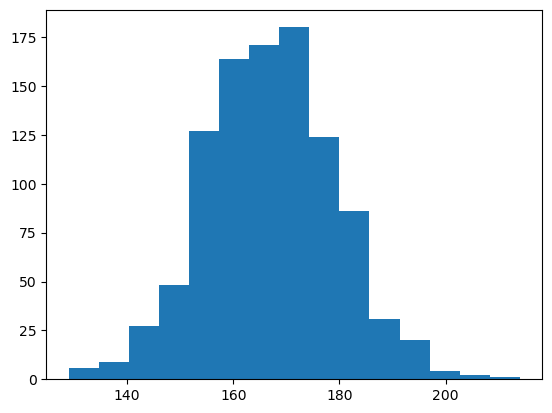

In [65]:
fig, ax = plt.subplots()
ax.hist(results, bins = 15)

In [66]:
results.mean()*5

834.345

In [67]:
1000 - results.mean()

833.131

In [68]:
results.mean()/1000

0.166869

In [55]:
d1 = np.arange(1, 7)
d2 = np.arange(1, 7)

In [56]:
mat = np.add.outer(d1,d2)

In [57]:
mat

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

In [59]:
mat.size

36

In [60]:
mat[mat == 7].size

6

In [61]:
mat[mat == 7].size / mat.size

0.16666666666666666

#### Monte Carlo Simulation with Portfolios and Sharpe Ratio

In [69]:
import pandas as pd
import datetime as dt
import pandas_datareader as pdr

In [202]:
tickers = ["AAPL","MSFT","IBM","TSLA"]
start = dt.datetime(2020,1,1)
end = dt.datetime(2021,3,1)
data = pdr.get_data_stooq(tickers,start,end)

In [203]:
data = data[::-1]

In [204]:
data = data['Close']

In [205]:
data.head()

Symbols,AAPL,MSFT,IBM,TSLA
Date,,,,
2020-01-02,73.5616,156.133,116.720,28.6840
2020-01-03,72.8488,154.216,115.784,29.5340
2020-01-06,73.4250,154.613,115.569,30.1027
2020-01-07,73.0831,153.183,115.656,31.2707
2020-01-08,74.2575,155.656,116.623,32.8093


In [206]:
log_returns = np.log(data/data.shift())

In [207]:
log_returns

Symbols,AAPL,MSFT,IBM,TSLA
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009737,-0.012354,-0.008052,0.029203
2020-01-06,0.007878,0.002571,-0.001859,0.019073
2020-01-07,-0.004667,-0.009292,0.000753,0.038067
2020-01-08,0.015942,0.016015,0.008326,0.048030
...,...,...,...,...
2021-02-23,-0.001115,-0.005254,-0.001144,-0.022161
2021-02-24,-0.004095,0.005427,0.020463,0.059953
2021-02-25,-0.035504,-0.024008,-0.006049,-0.084023


In [208]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.03282451, 0.35170672, 0.30043944, 0.31502933])

In [209]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [211]:
exp_rtn

0.7035859248300564

In [212]:
exp_vol = np.sqrt(np.dot(weight, np.dot(log_returns.cov()*252,weight)))

In [213]:
sharpe_ratio = exp_rtn / exp_vol

In [214]:
sharpe_ratio

1.5600948458547992

In [222]:
# Monte Carlo Simulation
n = 5000
weights = np.zeros((n,4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight, np.dot(log_returns.cov()*252,weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [223]:
sharpe_ratios.max()

2.0979919557212643

In [224]:
sharpe_ratios.argmax()

2496

In [225]:
weights[2496]

array([0.01484536, 0.06592535, 0.02716635, 0.89206294])

Text(0, 0.5, 'Expected Return')

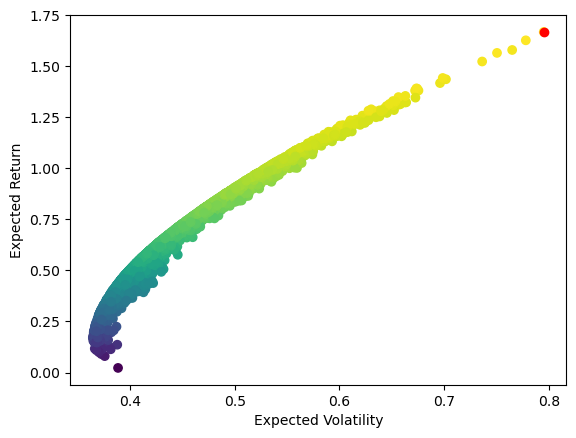

In [226]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")